# Ch4: Training Models

* [Linear Regression](#Linear-Regression)
* [The Normal Equation](#The-Normal-Equation)
* [Computation Complexity](#Computation-Complexity)
* [Gradient Descent](#Gradient-Descent)
	* [Batch Gradient Descent](#Batch-Gradient-Descent)
	* [Stochastic Gradient Descent](#Stochastic-Gradient-Descent)
	* [Mini-batch Gradient Descent](#Mini-batch-Gradient-Descent)
* [Polynomial Regression](#Polynomial-Regression)
	* [Learning Curves](#Learning-Curves)
* [Regularized Linear Models](#Regularized-Linear-Models)
	* [Ridge Regression](#Ridge-Regression)
	* [Lasso Regression](#Lasso-Regression)
	* [Elastic Net](#Elastic-Net)
	* [Early Stopping](#Early-Stopping)
* [Logistic Regression](#Logistic-Regression)
	* [Decision Boundaries](#Decision-Boundaries)
* [Softmax Regression](#Softmax-Regression)

## Linear Regression
Nothing to code

## The Normal Equation

In [23]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

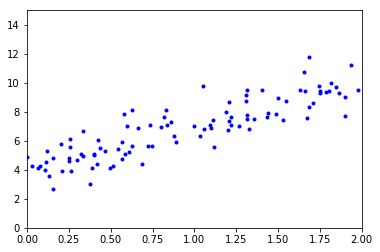

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [25]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.02017657],
       [ 3.01623391]])

In [26]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)

In [27]:
y_predict

array([[  4.02017657],
       [ 10.05264439]])

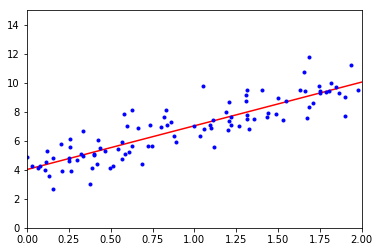

In [28]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 4.02017657]), array([[ 3.01623391]]))

## Computation Complexity
Nothing to code

## Gradient Descent

### Batch Gradient Descent

\\[
\mathrm{MSE(\mathbf{X},h_{\theta})}=\frac 1m \sum_{i=1}^m(\theta^T\centerdot \mathbf{x^{(i)}}-y^{(i)})^2
\\]
\\[\
\frac \partial{\partial \theta_j}\mathrm{MSE(\theta)}=\frac 2m \sum_{i=1}^m(\theta^T\centerdot\mathbf{x^{(i)}}-y^{(i)})x_j^{(i)}
\\]
\\[
\nabla_\theta\mathrm{MSE(\theta)}=\begin{pmatrix}
        \frac \partial{\partial \theta_0}\mathrm{MSE(\theta)}  \\      
        \frac \partial{\partial \theta_1}\mathrm{MSE(\theta)}   \\
        \vdots \\
        \frac \partial{\partial \theta_n}\mathrm{MSE(\theta)}
        \end{pmatrix}
        =\frac 2m \mathbf{X^T}\centerdot(\mathbf{X^T\centerdot\theta}-\mathbf{y})
\\]
\\[
\theta^{next \, step}=\theta-\eta\nabla_{\theta}\mathrm{MSE(\theta)}
\\]

**Note**: $m$ is the number of instances, $n$ is the number of features of each instance, $\mathbf{x^{(i)}}$ is a vector of all the feature values of the $i^{th}$ instance, $\mathbf{X}$ is a matrix containing all the feature values(excluding labels) of all instances.

In [30]:
#implementation of BGD
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)
for interation in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

**Learning rate** $\eta$ is important,you can use grid search to find a good learining rate.

In [31]:
theta

array([[ 4.02017657],
       [ 3.01623391]])

### Stochastic Gradient Descent

In [32]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1] #pay attention to this
        yi=y[random_index:random_index+1] #pay attention to this
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [33]:
theta

array([[ 4.00706726],
       [ 3.05275863]])

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
sgd_reg.intercept_,sgd_reg.coef_

(array([ 4.01648458]), array([ 2.99420708]))

### Mini-batch Gradient Descent

In [36]:
xi.T.dot(yi)

array([[ 2.98729697],
       [ 1.1190369 ]])

## Polynomial Regression

In [37]:
import numpy as np
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.rand(m,1)

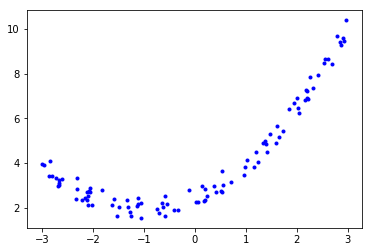

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y,'b.')

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [40]:
X[0]

array([-2.01417171])

In [41]:
X_poly[0]

array([-2.01417171,  4.05688768])

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lin_reg.intercept_,lin_reg.coef_

(array([ 2.40794777]), array([[ 1.01965238,  0.51097566]]))

## Learning Curves

In [44]:
from  sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

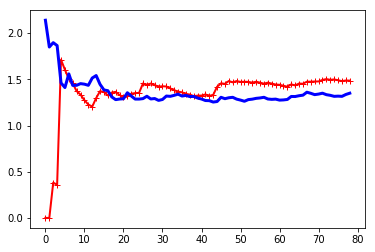

In [45]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

(0, 2)

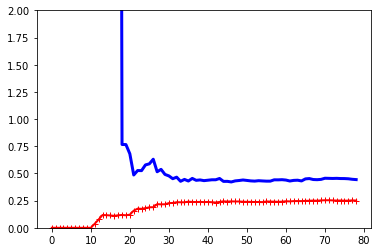

In [48]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline((
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression()),
))
plot_learning_curves(polynomial_regression,X,y)
plt.ylim(0,2) 

(0, 2)

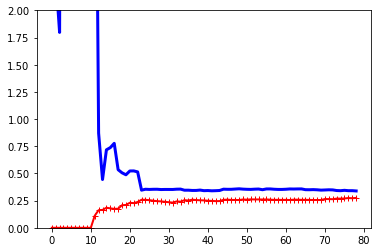

In [47]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0,2) 

## Regularized Linear Models

### Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 5.64366297]])

In [56]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

E:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 4.63533581])

### Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 5.60341309])

### Elastic Net

In [59]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 5.60403137])

### Early Stopping

In [60]:
from sklearn.base import clone

sgd_reg=SGDRegressor(n_iter=1,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val_predict,y_val)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

## Logistic Regression

### Estimating Probabilities
Nothing to code.

### Training and Cost Function
Nothing to code.

### Decision Boundaries

In [61]:
from sklearn import datasets
iris=datasets.load_iris()

In [62]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [68]:
X=iris["data"][:,3:].reshape(-1,1)
y=(iris["target"]==2).astype(np.int)

In [69]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)

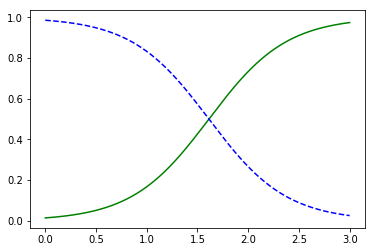

In [77]:
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")

In [78]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## Softmax Regression

In [79]:
X=iris["data"][:,(2,3)]
y=iris["target"]

In [80]:
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
softmax_reg.predict([[5,2]])

array([2])

In [82]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])